In [1]:
from importlib import reload
import config
reload(config)
import os

import torch
from torch import nn
from torch.utils.data import DataLoader

# %load_ext tensorboard

import dataset, model, trainer
import numpy as np
import util

{3: 0.48455191075636384, 4: 0.38195447860326204, 5: 2, 6: 0.4200930959958309, 7: -0.1187455583541841, 8: -0.10374725518492356, 9: 0.3411116781015898, 10: -0.052588777510359286, 11: -0.24843596537518053, 12: -0.29438718321320145, 13: 0.39631219535274786, 14: 0.10103204264206345, 15: 0.16910021578505063, 16: -0.09827254645040295, 17: 0.05024086945043982, 18: -0.33881457358213785, 19: 0.15543249940805615, 20: 0.4999664992712839}


C:\GitHub\smlm-dl\smlm_dl\dataset.py:312: RuntimeWarning: invalid value encountered in log
  im = axes[1].imshow(np.log(tiled_images))


104:	 [id = 104.000,], [A = 1315.519,], [bg = 91.865,], [x = -4.236,], [y = 10.375,], [z = -1.300,],
23:	 [id = 23.000,], [A = 1182.034,], [bg = 11.294,], [x = -7.189,], [y = 4.200,], [z = 4.965,],
43:	 [id = 43.000,], [A = 1621.745,], [bg = 69.212,], [x = -6.419,], [y = 7.914,], [z = -4.315,],
22:	 [id = 22.000,], [A = 1036.846,], [bg = 49.335,], [x = 3.435,], [y = 10.428,], [z = 5.276,],
72:	 [id = 72.000,], [A = 753.478,], [bg = 40.618,], [x = -5.239,], [y = -9.319,], [z = -8.511,],
102:	 [id = 102.000,], [A = 1970.284,], [bg = 52.260,], [x = -4.841,], [y = 5.896,], [z = 3.559,],
39:	 [id = 39.000,], [A = 1199.638,], [bg = 87.116,], [x = -5.655,], [y = 0.188,], [z = -6.298,],
46:	 [id = 46.000,], [A = 689.116,], [bg = 25.605,], [x = -5.212,], [y = 4.283,], [z = -6.823,],
121:	 [id = 121.000,], [A = 633.972,], [bg = 75.096,], [x = 7.636,], [y = 0.405,], [z = -2.889,],
41:	 [id = 41.000,], [A = 1562.676,], [bg = 12.427,], [x = 9.406,], [y = -9.039,], [z = 9.846,],
65:	 [id = 65.000,],

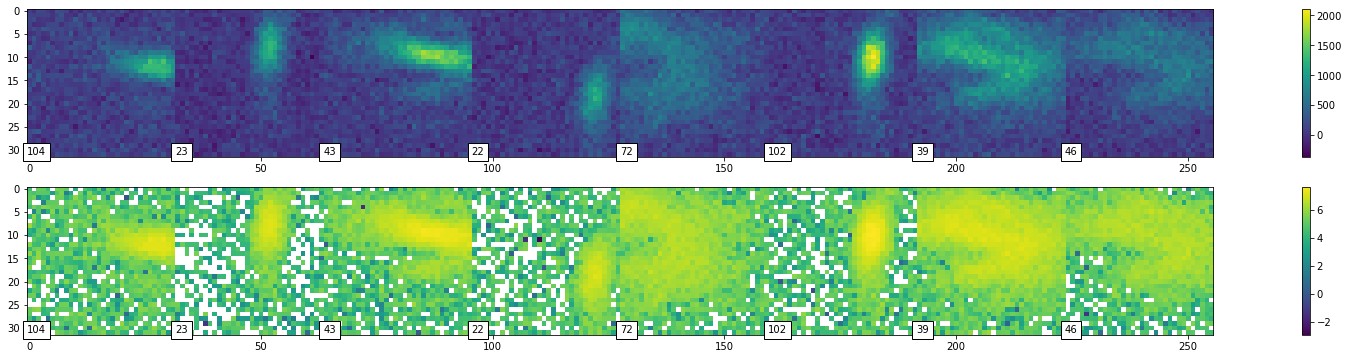

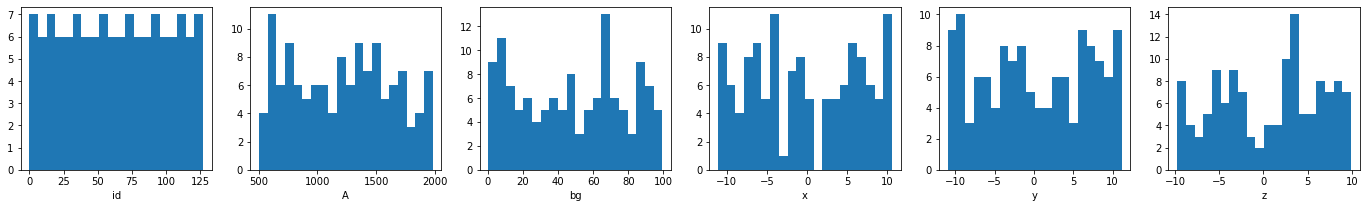

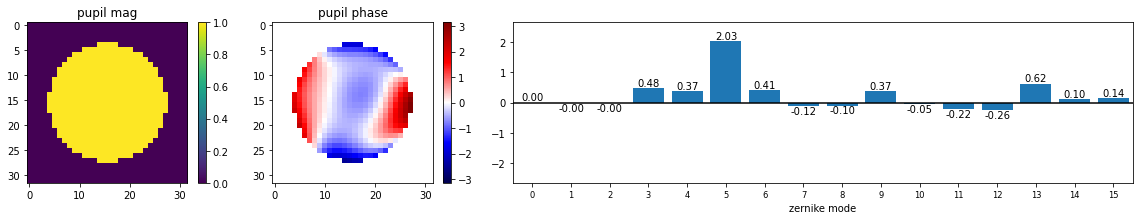

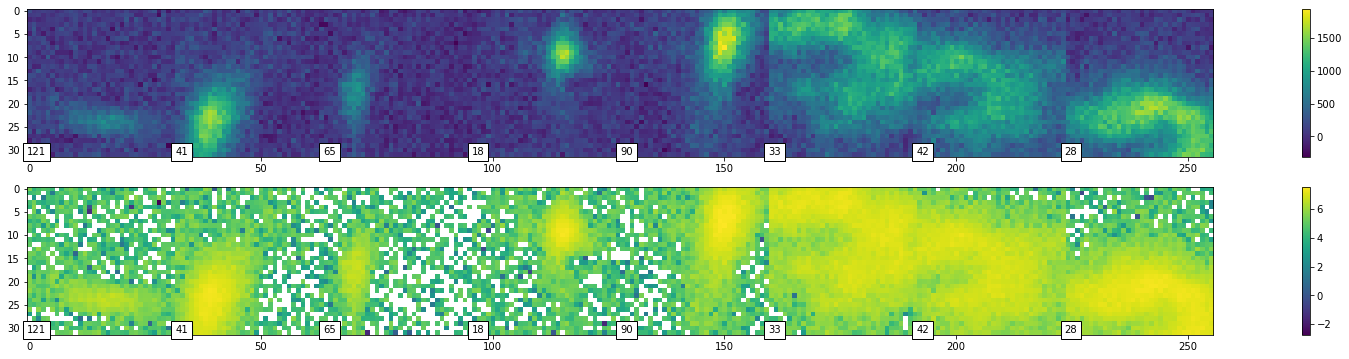

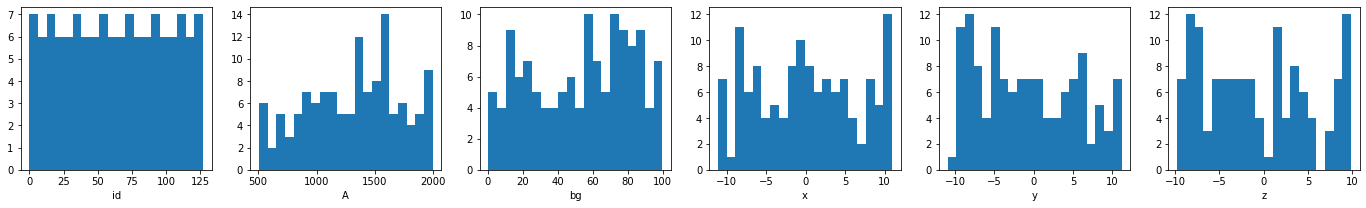

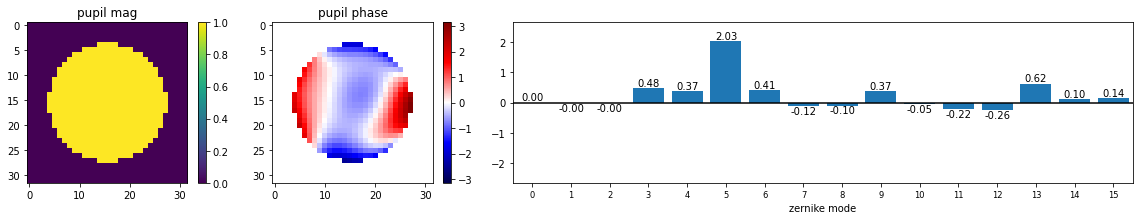

In [2]:
reload(dataset)

psf_zerns = dict()
for z in range(3, 21):
    psf_zerns[z] = np.random.uniform(-0.5, 0.5)
psf_zerns.update({5:2 })

print(psf_zerns)

settings = {
    # 'out_size': (64,64),
    'length': (128, 1),
    'dropout_p': 0,
    'psf_params': {'z':[-10,10]},
    'psf_zerns': psf_zerns,
    # 'noise_params': {},
    'normalize': False,
    # 'padding': (4,4),
    # 'random_z': True,
    "augmentations":{},
    # "augmentations":{"pixel shift":(4,4), }#"add noise":0.1},
}

# training_data = dataset.FourierOptics2DPSFDataset(**settings)
# training_data = dataset.Gaussian2DPSFDataset(**settings)
training_data = dataset.FourierOpticsPSFDataset(**settings)
dataset.inspect_images(training_data)
train_dataloader = DataLoader(training_data, batch_size=64, shuffle=True)


# valid_data = dataset.FourierOptics2DPSFDataset(**settings)
# valid_data = dataset.Gaussian2DPSFDataset(**settings)
valid_data = dataset.FourierOpticsPSFDataset(**settings)
dataset.inspect_images(valid_data)
valid_dataloader = DataLoader(valid_data, batch_size=64, shuffle=True)

CUDA not available. Defaulting to CPU
Device: cpu
Saved to : F:\Pytorch\runs\2022-01-03_19-13-41_MW1E008F61\model.ptm


C:\Users\kkc29\Anaconda3\envs\smlm-dl\lib\site-packages\torch\cuda\__init__.py:80: UserWarning: CUDA initialization: The NVIDIA driver on your system is too old (found version 9010). Please update your GPU driver by downloading and installing a new version from the URL: http://www.nvidia.com/Download/index.aspx Alternatively, go to: https://pytorch.org to install a PyTorch version that has been compiled with your version of the CUDA driver. (Triggered internally at  ..\c10\cuda\CUDAFunctions.cpp:112.)
  return torch._C._cuda_getDeviceCount() > 0


  0%|          | 0/2 [00:00<?, ?it/s]

0it [00:00, ?it/s]

Saved to : F:\Pytorch\runs\2022-01-03_19-13-41_MW1E008F61\checkpoint.ptc
model_state_dict: odict_keys(['encoder.encoders.scale.weight'])
optimizer_state_dict: dict_keys(['state', 'param_groups'])
loss_function_state_dict: odict_keys([])
log_path: F:\Pytorch\runs\2022-01-03_19-13-41_MW1E008F61
epoch: 1
loss: 132321.375


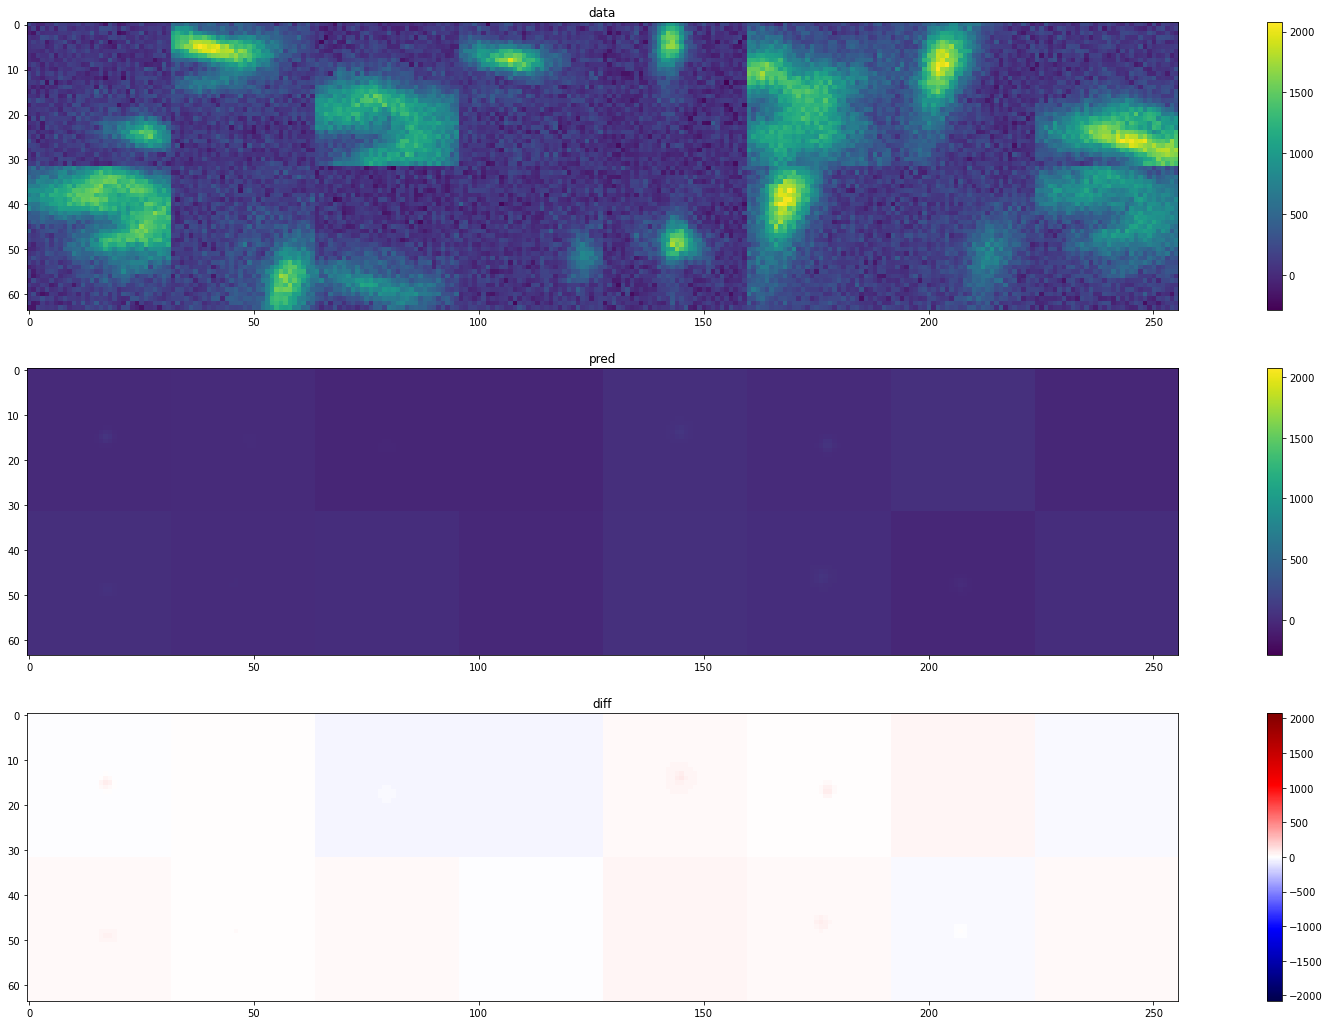

In [3]:
reload(trainer)
fitting_model = model.Gaussian2DModel(encoder_class=model.IdEncoderModel,
                                      # img_size=(32,32),
                                      fit_params=['x','y','A','sig','bg'],
                                      max_psf_count=1,
                                      encoder_params={"num_img":len(train_dataloader.dataset)
                                          # "depth":3,
                                                      # "skip_channels":4,
                                                      # "first_layer_out_channels":16,
                                                     }
                                     )
training = trainer.FittingTrainer(fitting_model, train_dataloader, valid_dataloader,)
training.train_and_validate(2,)
# model.check_model(fitting_model, )

# filepath = training.current_state["log_path"]
# print(filepath)
# training = trainer.FittingTrainer.from_model_file(os.path.join(filepath, "model.ptm"))
# training.load_checkpoint(os.path.join(filepath, "checkpoint.ptc"))
# training.train_data_loader = train_dataloader
# training.valid_data_loader = valid_dataloader
# training.train_and_validate(2, label="test")
# model.check_model(fitting_model, )

CUDA not available. Defaulting to CPU
Device: cpu
Saved to : F:\Pytorch\runs\2022-01-03_19-13-42_MW1E008F61\model.ptm


  0%|          | 0/2 [00:00<?, ?it/s]

0it [00:00, ?it/s]

Saved to : F:\Pytorch\runs\2022-01-03_19-13-42_MW1E008F61\checkpoint.ptc
model_state_dict: odict_keys(['encoder.encoders.conv_layer0.0.weight', 'encoder.encoders.conv_layer0.0.bias', 'encoder.encoders.conv_layer0.2.weight', 'encoder.encoders.conv_layer0.2.bias', 'encoder.encoders.conv_layer1.0.weight', 'encoder.encoders.conv_layer1.0.bias', 'encoder.encoders.conv_layer1.2.weight', 'encoder.encoders.conv_layer1.2.bias', 'encoder.encoders.conv_layer2.0.weight', 'encoder.encoders.conv_layer2.0.bias', 'encoder.encoders.conv_layer2.2.weight', 'encoder.encoders.conv_layer2.2.bias', 'encoder.neck.conv_layer_0.0.weight', 'encoder.neck.conv_layer_0.0.bias', 'encoder.neck.conv_layer_0.1.weight', 'encoder.neck.conv_layer_0.1.bias', 'encoder.neck.conv_layer_0.3.weight', 'encoder.neck.conv_layer_0.3.bias', 'encoder.neck.conv_layer_0.4.weight', 'encoder.neck.conv_layer_0.4.bias', 'encoder.neck.conv_layer_1.0.weight', 'encoder.neck.conv_layer_1.0.bias', 'encoder.neck.conv_layer_1.1.weight', 'encoder.

C:\GitHub\smlm-dl\smlm_dl\model\base.py:125: RuntimeWarning: invalid value encountered in log10
  im = axes[0, i].imshow(np.log10(img[0]))


F:\Pytorch\runs\2022-01-03_19-13-42_MW1E008F61
No training data supplied. Remember to set prior to training.
No validation data supplied. Remember to set prior to training.
CUDA not available. Defaulting to CPU
Device: cpu
Loaded from F:\Pytorch\runs\2022-01-03_19-13-42_MW1E008F61\model.ptm, last modified: Mon Jan  3 19:13:42 2022
Layer (type:depth-idx)                   Param #
Gaussian2DModel                          --
├─DirectMapperModel: 1-1                 --
├─Gaussian2DRenderer: 1-2                --
├─ConvImageEncoderModel: 1-3             --
│    └─ModuleDict: 2-1                   --
│    │    └─Sequential: 3-1              2,480
│    │    └─Sequential: 3-2              13,888
│    │    └─Sequential: 3-3              55,424
│    └─ModuleDict: 2-2                   --
│    └─ModuleDict: 2-3                   --
│    │    └─Sequential: 3-4              221,824
│    │    └─Sequential: 3-5              131,392
│    └─ModuleDict: 2-4                   --
│    │    └─Conv2d: 3-6  

  0%|          | 0/2 [00:00<?, ?it/s]

0it [00:00, ?it/s]

Saved to : F:\Pytorch\runs\2022-01-03_19-13-44_MW1E008F61_test\checkpoint.ptc
model_state_dict: odict_keys(['encoder.encoders.conv_layer0.0.weight', 'encoder.encoders.conv_layer0.0.bias', 'encoder.encoders.conv_layer0.2.weight', 'encoder.encoders.conv_layer0.2.bias', 'encoder.encoders.conv_layer1.0.weight', 'encoder.encoders.conv_layer1.0.bias', 'encoder.encoders.conv_layer1.2.weight', 'encoder.encoders.conv_layer1.2.bias', 'encoder.encoders.conv_layer2.0.weight', 'encoder.encoders.conv_layer2.0.bias', 'encoder.encoders.conv_layer2.2.weight', 'encoder.encoders.conv_layer2.2.bias', 'encoder.neck.conv_layer_0.0.weight', 'encoder.neck.conv_layer_0.0.bias', 'encoder.neck.conv_layer_0.1.weight', 'encoder.neck.conv_layer_0.1.bias', 'encoder.neck.conv_layer_0.3.weight', 'encoder.neck.conv_layer_0.3.bias', 'encoder.neck.conv_layer_0.4.weight', 'encoder.neck.conv_layer_0.4.bias', 'encoder.neck.conv_layer_1.0.weight', 'encoder.neck.conv_layer_1.0.bias', 'encoder.neck.conv_layer_1.1.weight', 'enc

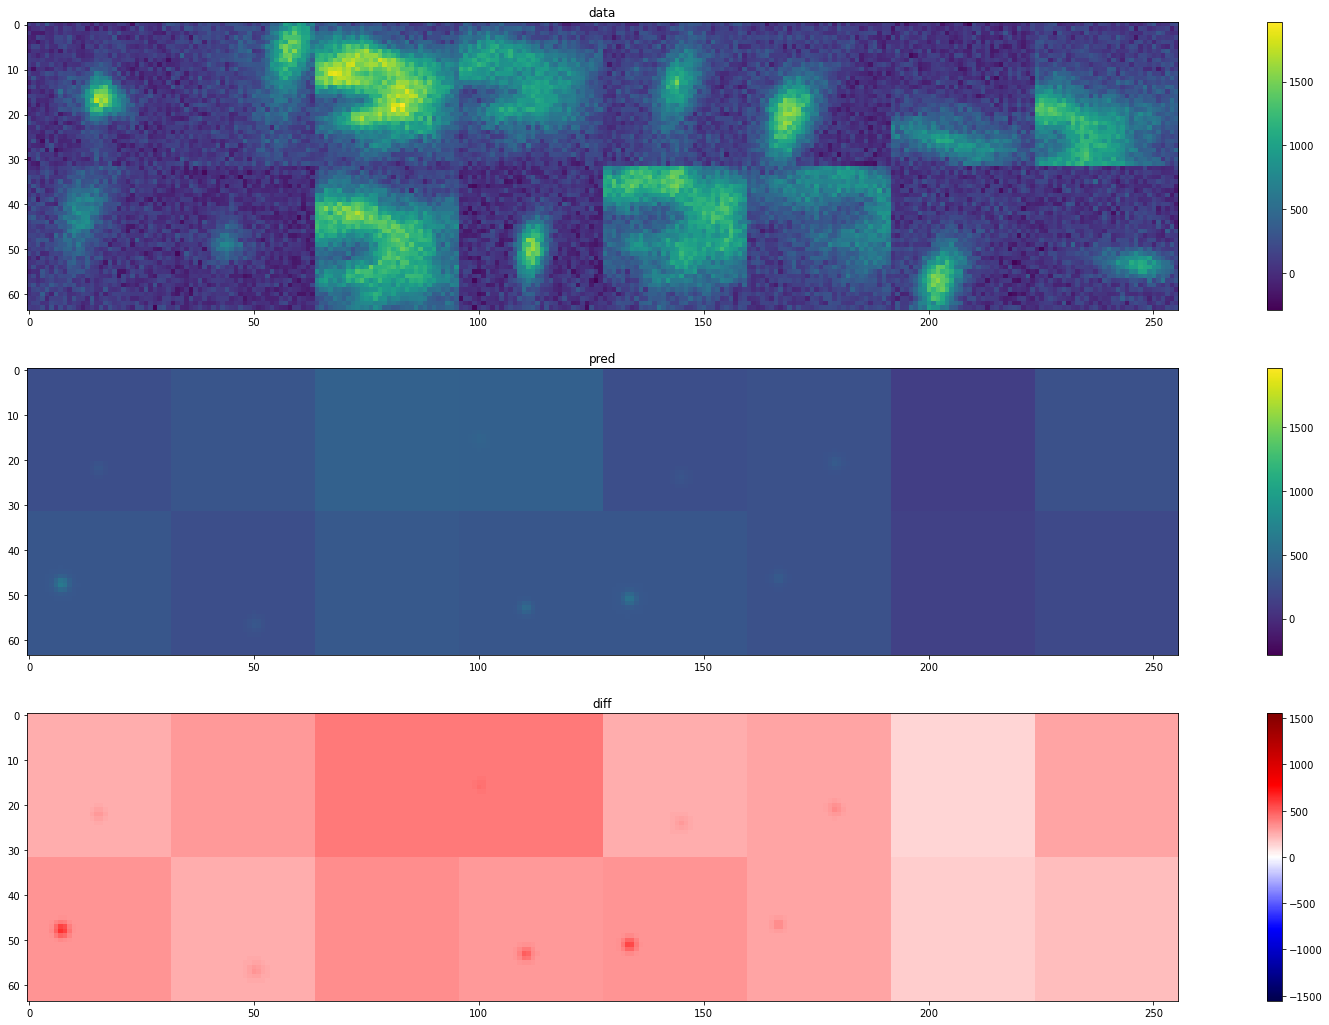

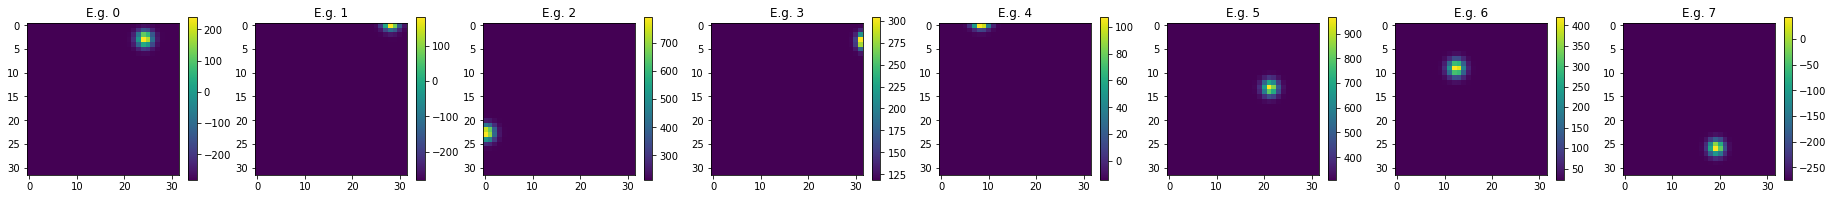

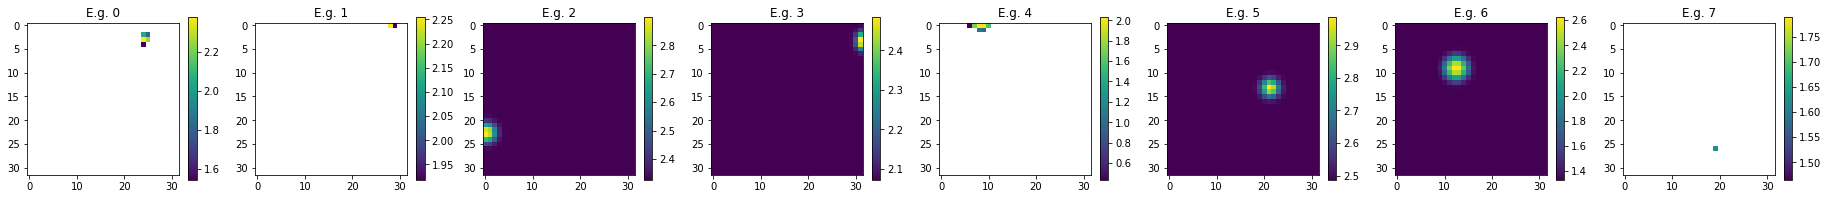

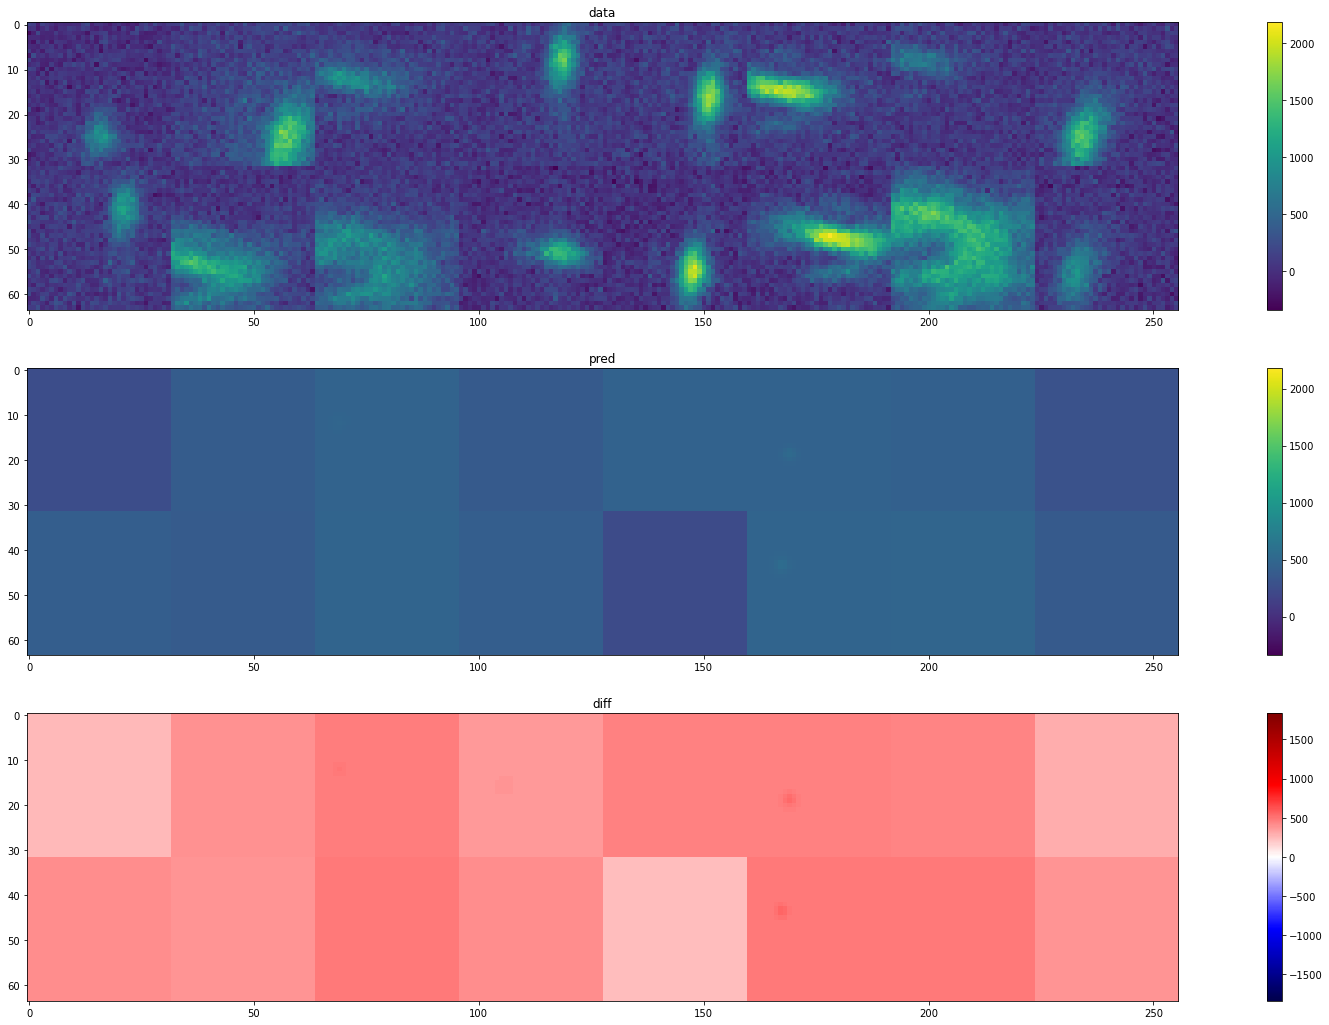

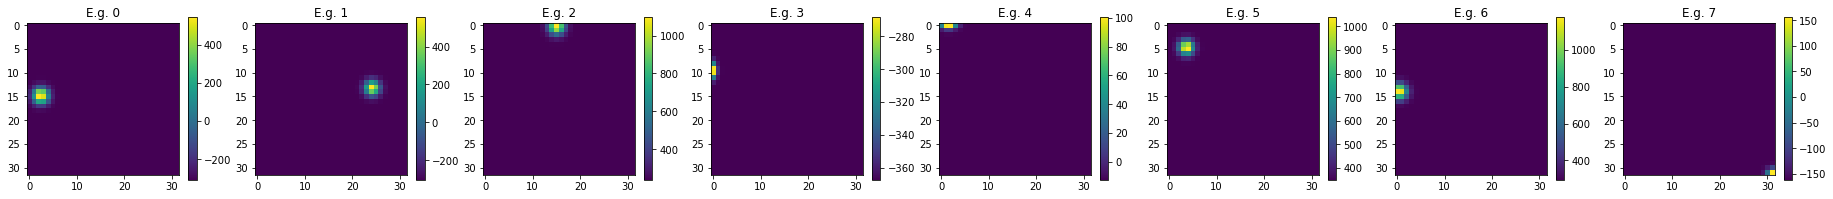

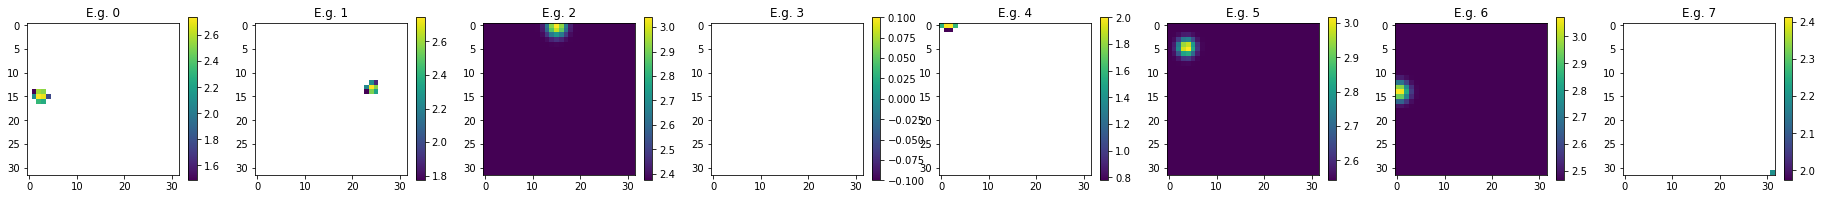

In [4]:
reload(trainer)
fitting_model = model.Gaussian2DModel(fit_params=['x','y','sig', 'A', 'bg'])
training = trainer.FittingTrainer(fitting_model, train_dataloader, valid_dataloader,)
training.train_and_validate(2,)
model.check_model(fitting_model, )

filepath = training.current_state["log_path"]
print(filepath)
training = trainer.FittingTrainer.from_model_file(os.path.join(filepath, "model.ptm"))
training.load_checkpoint(os.path.join(filepath, "checkpoint.ptc"))
training.train_data_loader = train_dataloader
training.valid_data_loader = valid_dataloader
training.train_and_validate(2, label="test")
model.check_model(fitting_model, )

CUDA not available. Defaulting to CPU
Device: cpu
Saved to : F:\Pytorch\runs\2022-01-03_19-13-52_MW1E008F61\model.ptm


  0%|          | 0/2 [00:00<?, ?it/s]

0it [00:00, ?it/s]

C:\Users\kkc29\Anaconda3\envs\smlm-dl\lib\site-packages\torch\autograd\__init__.py:154: UserWarning: Casting complex values to real discards the imaginary part (Triggered internally at  ..\aten\src\ATen\native\Copy.cpp:244.)
  Variable._execution_engine.run_backward(


Saved to : F:\Pytorch\runs\2022-01-03_19-13-52_MW1E008F61\checkpoint.ptc
model_state_dict: odict_keys(['renderer.scale_factor', 'renderer.template.0.parameter', 'encoder.encoders.conv_layer0.0.weight', 'encoder.encoders.conv_layer0.0.bias', 'encoder.encoders.conv_layer0.2.weight', 'encoder.encoders.conv_layer0.2.bias', 'encoder.encoders.conv_layer1.0.weight', 'encoder.encoders.conv_layer1.0.bias', 'encoder.encoders.conv_layer1.2.weight', 'encoder.encoders.conv_layer1.2.bias', 'encoder.encoders.conv_layer2.0.weight', 'encoder.encoders.conv_layer2.0.bias', 'encoder.encoders.conv_layer2.2.weight', 'encoder.encoders.conv_layer2.2.bias', 'encoder.neck.conv_layer_0.0.weight', 'encoder.neck.conv_layer_0.0.bias', 'encoder.neck.conv_layer_0.1.weight', 'encoder.neck.conv_layer_0.1.bias', 'encoder.neck.conv_layer_0.3.weight', 'encoder.neck.conv_layer_0.3.bias', 'encoder.neck.conv_layer_0.4.weight', 'encoder.neck.conv_layer_0.4.bias', 'encoder.neck.conv_layer_1.0.weight', 'encoder.neck.conv_layer_

  0%|          | 0/2 [00:00<?, ?it/s]

0it [00:00, ?it/s]

Saved to : F:\Pytorch\runs\2022-01-03_19-13-56_MW1E008F61\checkpoint.ptc
model_state_dict: odict_keys(['renderer.scale_factor', 'renderer.template.0.parameter', 'encoder.encoders.conv_layer0.0.weight', 'encoder.encoders.conv_layer0.0.bias', 'encoder.encoders.conv_layer0.2.weight', 'encoder.encoders.conv_layer0.2.bias', 'encoder.encoders.conv_layer1.0.weight', 'encoder.encoders.conv_layer1.0.bias', 'encoder.encoders.conv_layer1.2.weight', 'encoder.encoders.conv_layer1.2.bias', 'encoder.encoders.conv_layer2.0.weight', 'encoder.encoders.conv_layer2.0.bias', 'encoder.encoders.conv_layer2.2.weight', 'encoder.encoders.conv_layer2.2.bias', 'encoder.neck.conv_layer_0.0.weight', 'encoder.neck.conv_layer_0.0.bias', 'encoder.neck.conv_layer_0.1.weight', 'encoder.neck.conv_layer_0.1.bias', 'encoder.neck.conv_layer_0.3.weight', 'encoder.neck.conv_layer_0.3.bias', 'encoder.neck.conv_layer_0.4.weight', 'encoder.neck.conv_layer_0.4.bias', 'encoder.neck.conv_layer_1.0.weight', 'encoder.neck.conv_layer_

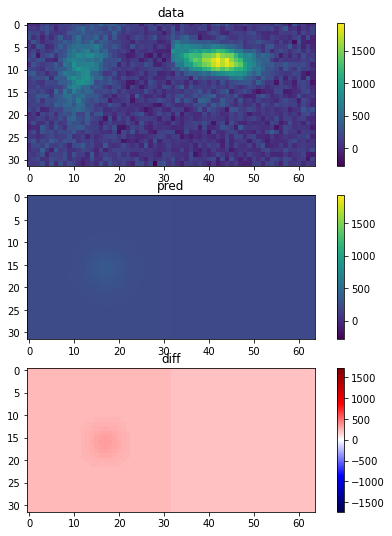

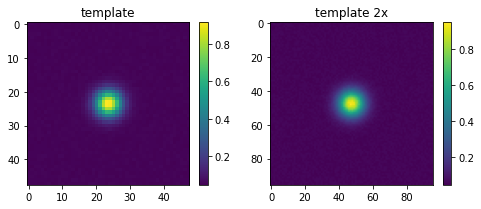

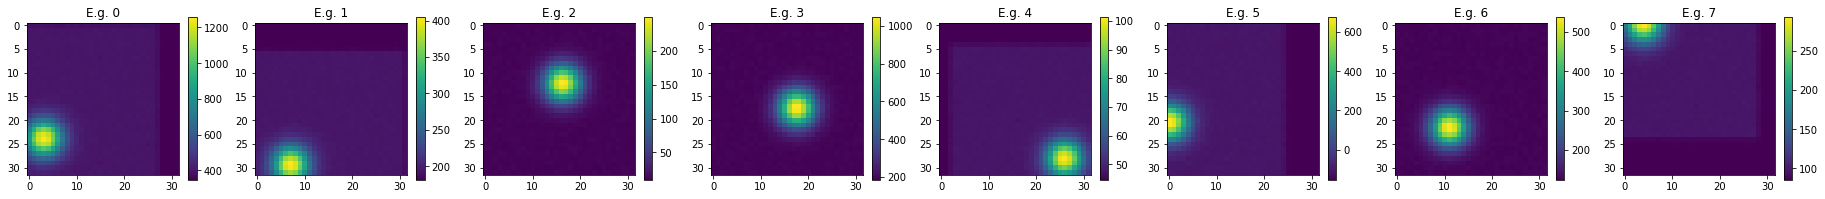

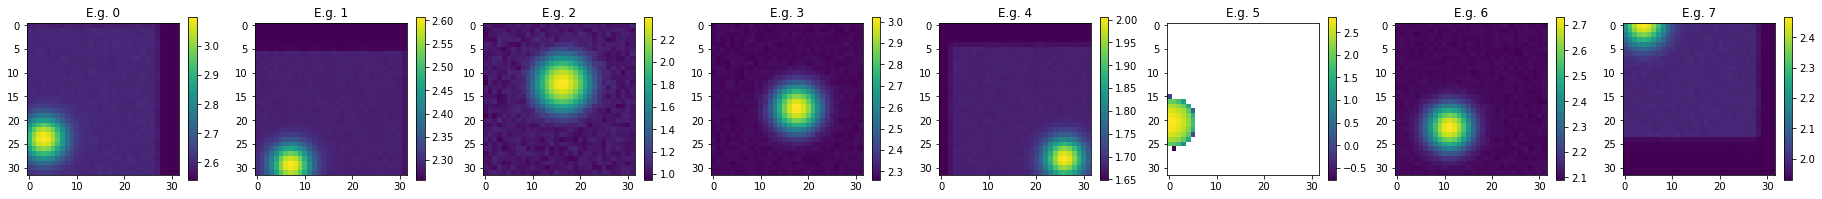

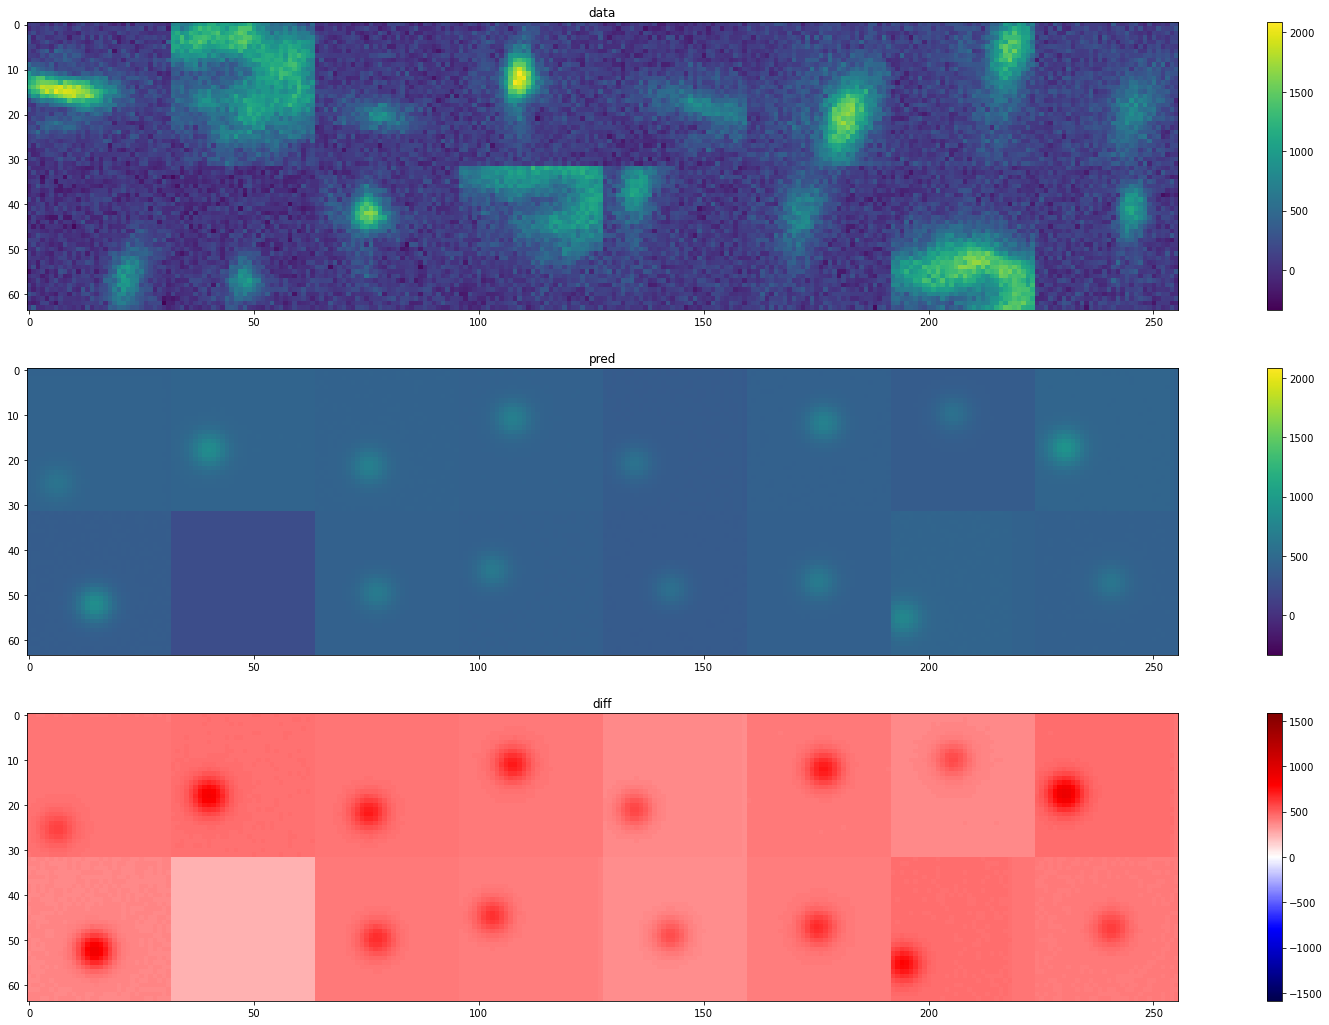

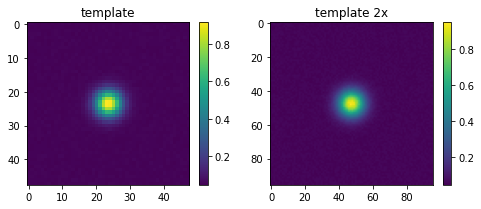

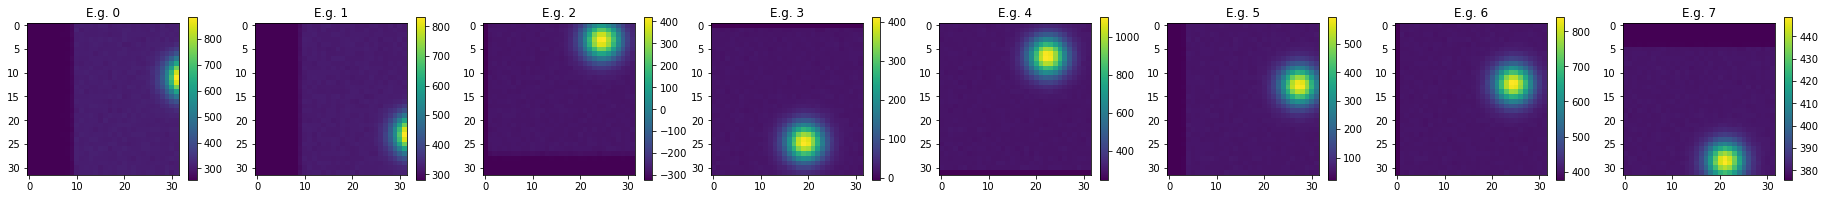

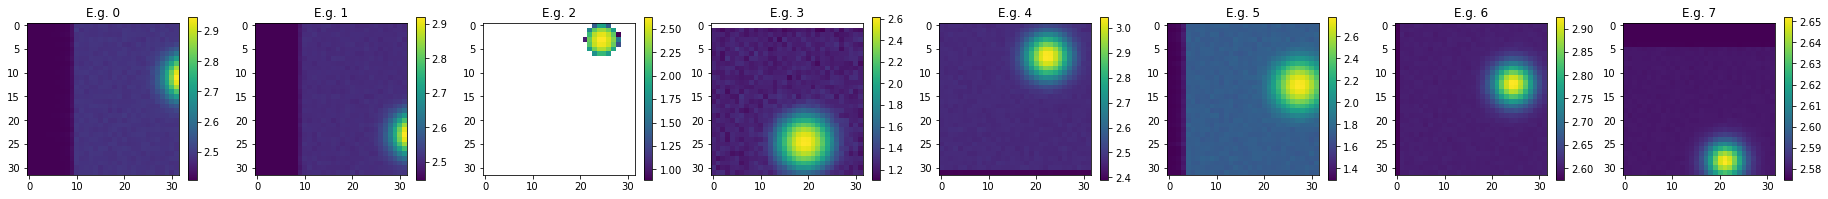

In [5]:
reload(trainer)
fitting_model = model.Template2DModel(fit_params=['x','y','A','bg'],                                      
                                      renderer_params={"template_padding":(8,8)},
                                     )
training = trainer.FittingTrainer(fitting_model, train_dataloader, valid_dataloader,)
training.train_and_validate(2, tb_log_limit_images=2, tb_logger=None)
model.check_model(fitting_model, )

filepath = training.current_state["log_path"]
print(filepath)
training = trainer.FittingTrainer.from_model_file(os.path.join(filepath, "model.ptm"))
training.load_checkpoint(os.path.join(filepath, "checkpoint.ptc"))
training.train_data_loader = train_dataloader
training.valid_data_loader = valid_dataloader
training.train_and_validate(2, validate_interval=1, tb_logger=None)
model.check_model(fitting_model, )

CUDA not available. Defaulting to CPU
Device: cpu
Saved to : F:\Pytorch\runs\2022-01-03_19-14-08_MW1E008F61\model.ptm


  0%|          | 0/2 [00:00<?, ?it/s]

0it [00:00, ?it/s]

Saved to : F:\Pytorch\runs\2022-01-03_19-14-08_MW1E008F61\checkpoint.ptc
model_state_dict: odict_keys(['renderer.mask', 'renderer.zern_tilt', 'renderer.zern_tip', 'renderer.zern_defocus', 'renderer.pupil_phase.0.parameter', 'encoder.encoders.conv_layer0.0.weight', 'encoder.encoders.conv_layer0.0.bias', 'encoder.encoders.conv_layer0.2.weight', 'encoder.encoders.conv_layer0.2.bias', 'encoder.encoders.conv_layer1.0.weight', 'encoder.encoders.conv_layer1.0.bias', 'encoder.encoders.conv_layer1.2.weight', 'encoder.encoders.conv_layer1.2.bias', 'encoder.encoders.conv_layer2.0.weight', 'encoder.encoders.conv_layer2.0.bias', 'encoder.encoders.conv_layer2.2.weight', 'encoder.encoders.conv_layer2.2.bias', 'encoder.neck.conv_layer_0.0.weight', 'encoder.neck.conv_layer_0.0.bias', 'encoder.neck.conv_layer_0.1.weight', 'encoder.neck.conv_layer_0.1.bias', 'encoder.neck.conv_layer_0.3.weight', 'encoder.neck.conv_layer_0.3.bias', 'encoder.neck.conv_layer_0.4.weight', 'encoder.neck.conv_layer_0.4.bias', 

  0%|          | 0/2 [00:00<?, ?it/s]

0it [00:00, ?it/s]

Saved to : F:\Pytorch\runs\2022-01-03_19-14-11_MW1E008F61\checkpoint.ptc
model_state_dict: odict_keys(['renderer.mask', 'renderer.zern_tilt', 'renderer.zern_tip', 'renderer.zern_defocus', 'renderer.pupil_phase.0.parameter', 'encoder.encoders.conv_layer0.0.weight', 'encoder.encoders.conv_layer0.0.bias', 'encoder.encoders.conv_layer0.2.weight', 'encoder.encoders.conv_layer0.2.bias', 'encoder.encoders.conv_layer1.0.weight', 'encoder.encoders.conv_layer1.0.bias', 'encoder.encoders.conv_layer1.2.weight', 'encoder.encoders.conv_layer1.2.bias', 'encoder.encoders.conv_layer2.0.weight', 'encoder.encoders.conv_layer2.0.bias', 'encoder.encoders.conv_layer2.2.weight', 'encoder.encoders.conv_layer2.2.bias', 'encoder.neck.conv_layer_0.0.weight', 'encoder.neck.conv_layer_0.0.bias', 'encoder.neck.conv_layer_0.1.weight', 'encoder.neck.conv_layer_0.1.bias', 'encoder.neck.conv_layer_0.3.weight', 'encoder.neck.conv_layer_0.3.bias', 'encoder.neck.conv_layer_0.4.weight', 'encoder.neck.conv_layer_0.4.bias', 

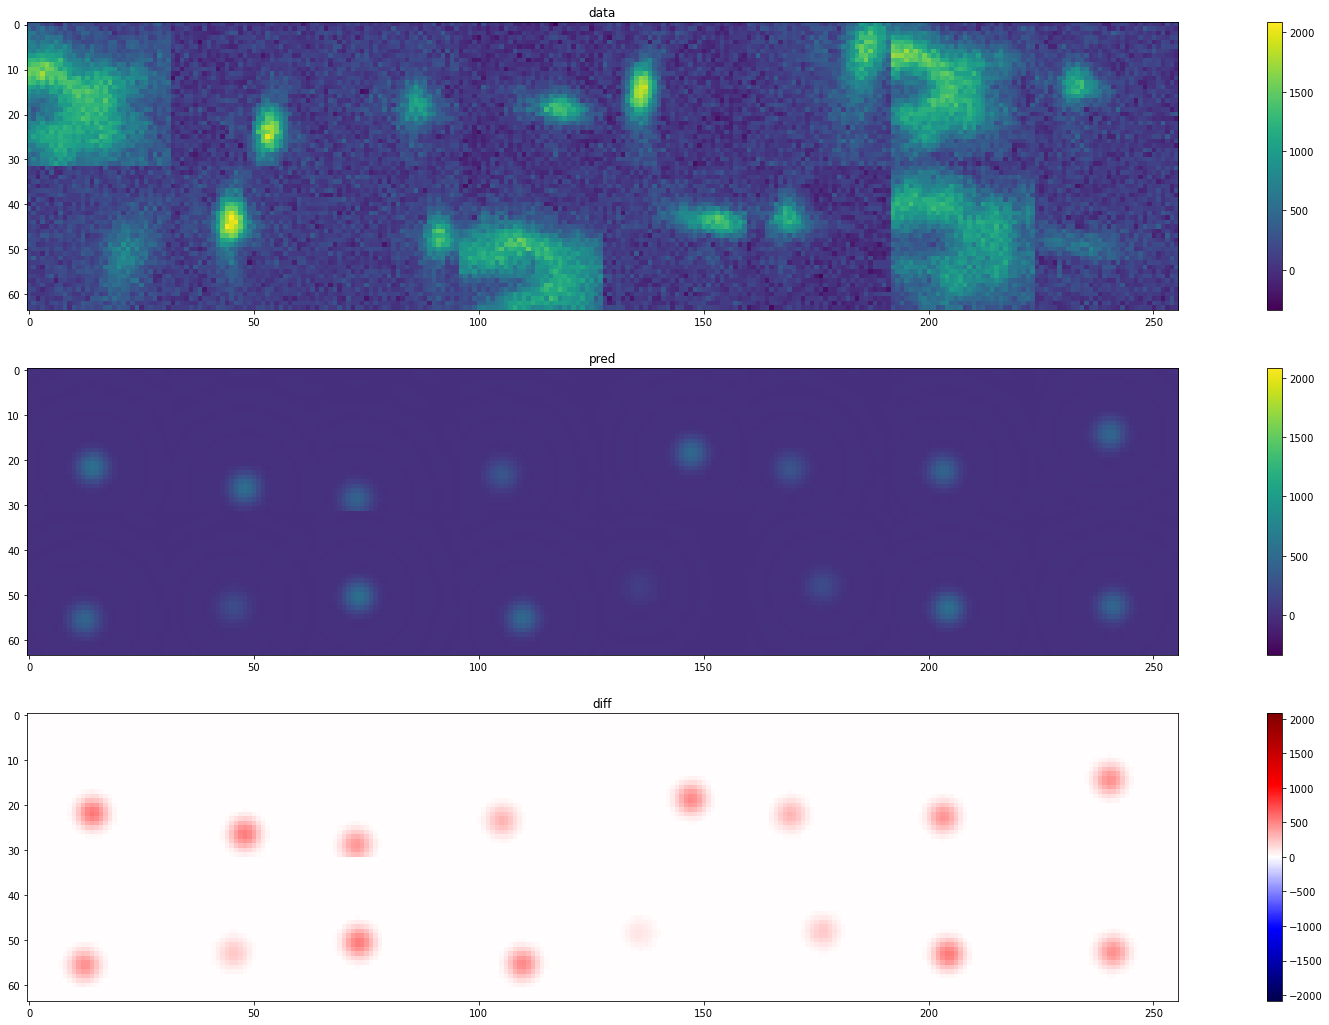

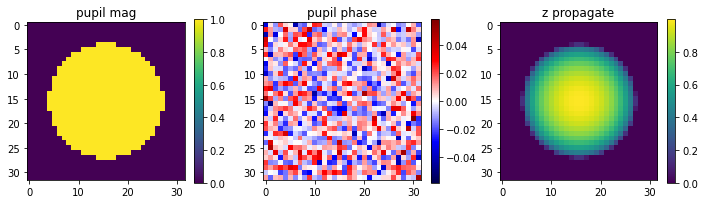

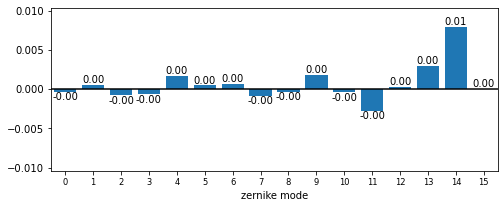

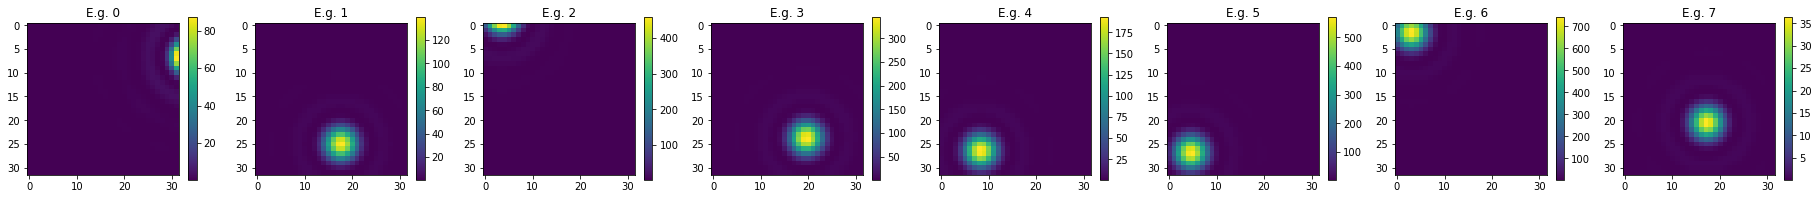

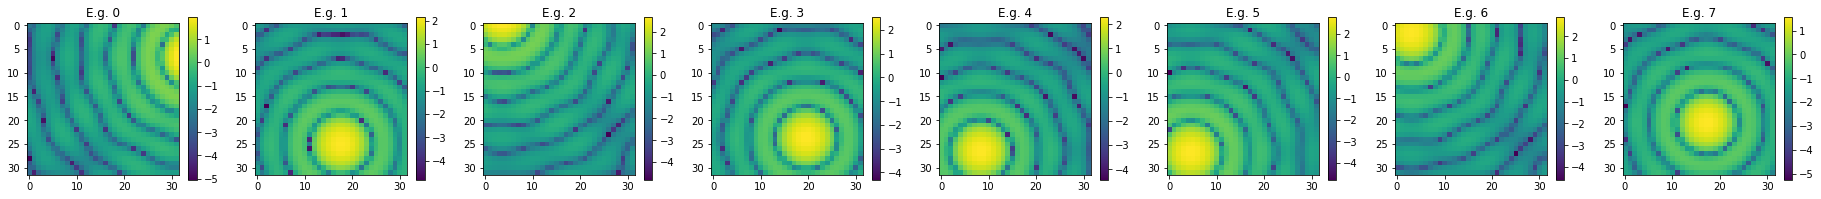

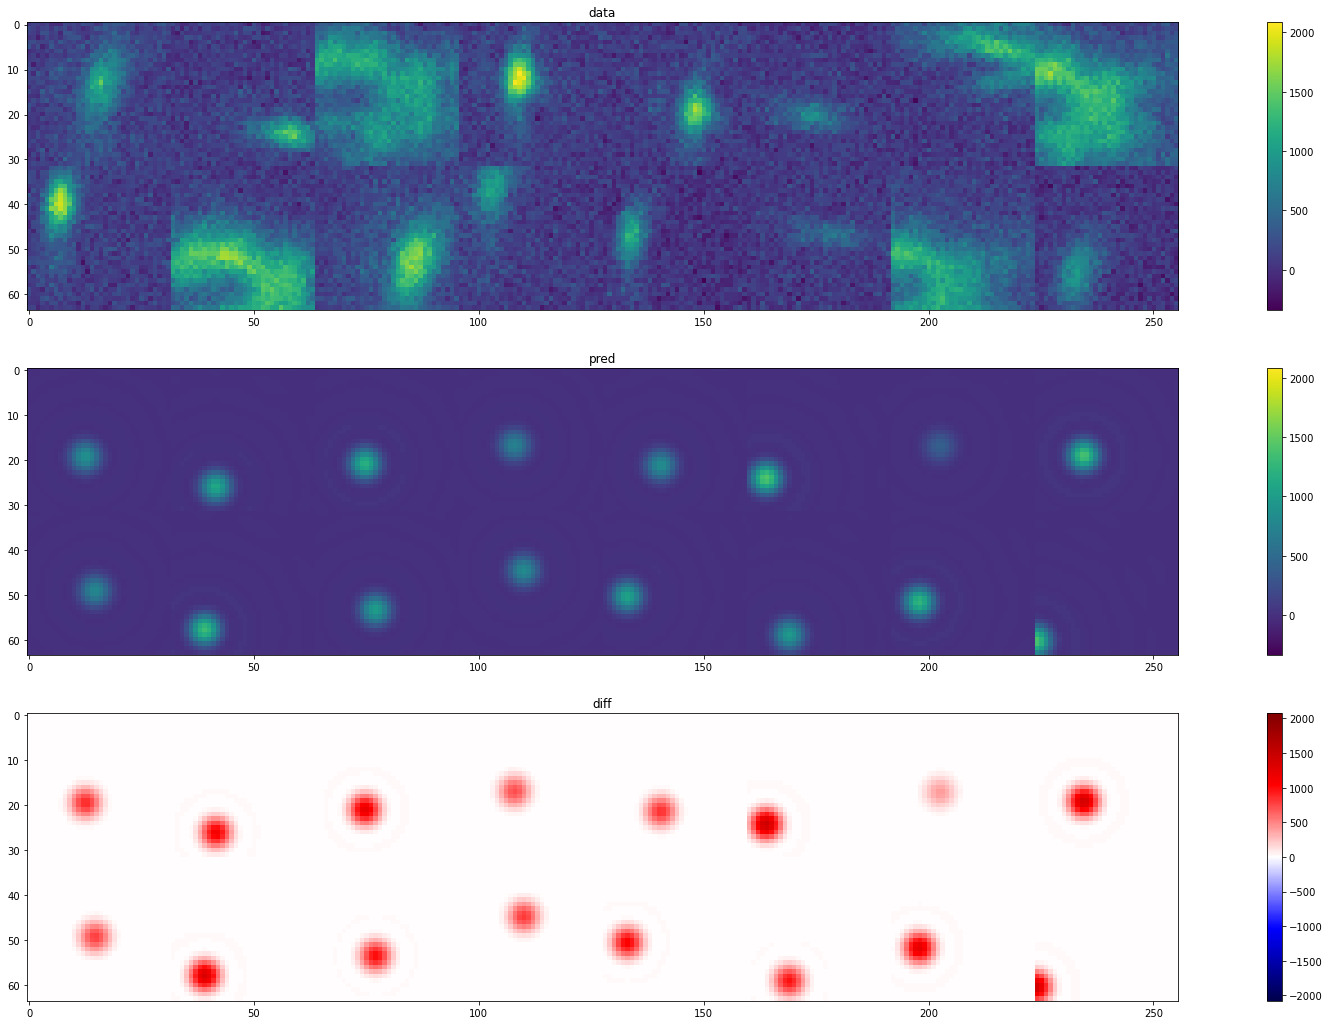

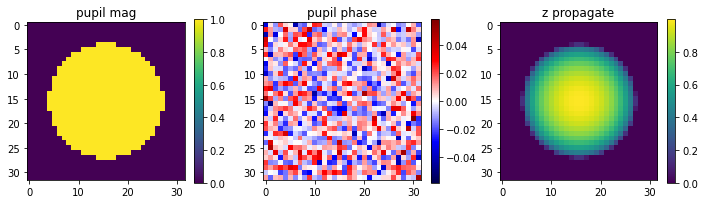

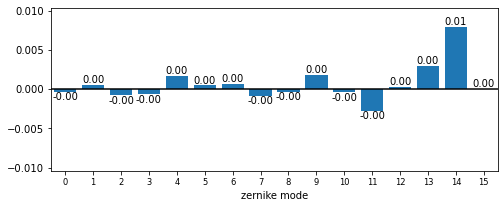

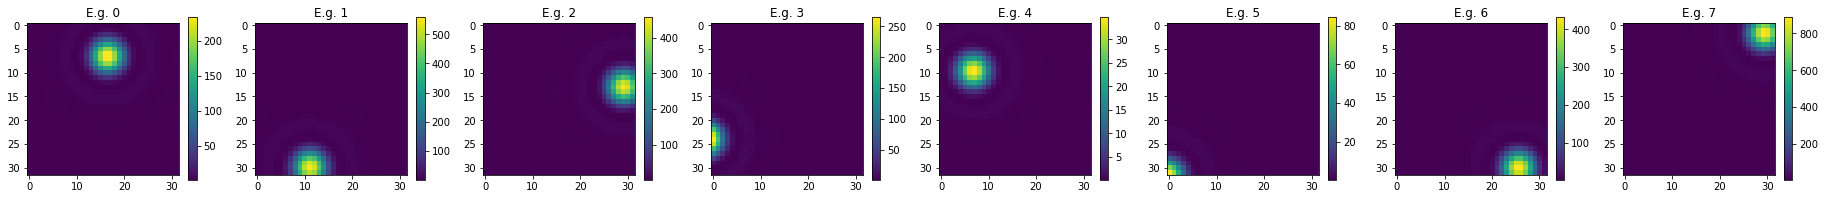

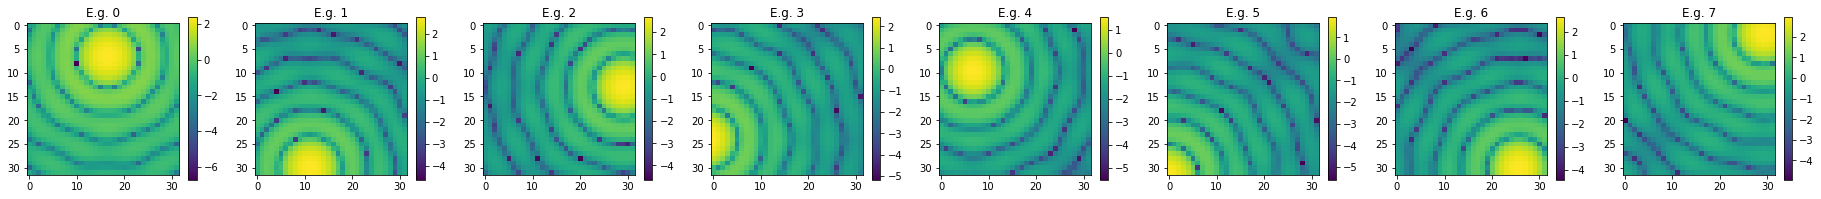

In [6]:
reload(trainer)
fitting_model = model.FourierOptics2DModel(fit_params=['x','y','A', ])
training = trainer.FittingTrainer(fitting_model, train_dataloader, valid_dataloader,)
training.train_and_validate(2, tb_logger=None)
model.check_model(fitting_model, )

filepath = training.current_state["log_path"]
print(filepath)
training = trainer.FittingTrainer.from_model_file(os.path.join(filepath, "model.ptm"))
training.load_checkpoint(os.path.join(filepath, "checkpoint.ptc"))
training.train_data_loader = train_dataloader
training.valid_data_loader = valid_dataloader
training.train_and_validate(2, tb_logger=None)
model.check_model(fitting_model, )

CUDA not available. Defaulting to CPU
Device: cpu
Saved to : F:\Pytorch\runs\2022-01-03_19-14-21_MW1E008F61\model.ptm


  0%|          | 0/2 [00:00<?, ?it/s]

0it [00:00, ?it/s]

Saved to : F:\Pytorch\runs\2022-01-03_19-14-21_MW1E008F61\checkpoint.ptc
model_state_dict: odict_keys(['mapper.XYS', 'renderer.scale_factor', 'renderer.template.0.parameter', 'encoder.encoders.conv_layer0.0.weight', 'encoder.encoders.conv_layer0.0.bias', 'encoder.encoders.conv_layer0.2.weight', 'encoder.encoders.conv_layer0.2.bias', 'encoder.encoders.conv_layer1.0.weight', 'encoder.encoders.conv_layer1.0.bias', 'encoder.encoders.conv_layer1.2.weight', 'encoder.encoders.conv_layer1.2.bias', 'encoder.encoders.conv_layer2.0.weight', 'encoder.encoders.conv_layer2.0.bias', 'encoder.encoders.conv_layer2.2.weight', 'encoder.encoders.conv_layer2.2.bias', 'encoder.neck.0.weight', 'encoder.neck.0.bias', 'encoder.neck.2.weight', 'encoder.neck.2.bias', 'encoder.decoders.up_conv_layer0.0.weight', 'encoder.decoders.up_conv_layer0.0.bias', 'encoder.decoders.conv_layer0.0.weight', 'encoder.decoders.conv_layer0.0.bias', 'encoder.decoders.conv_layer0.2.weight', 'encoder.decoders.conv_layer0.2.bias', 'en

  0%|          | 0/2 [00:00<?, ?it/s]

0it [00:00, ?it/s]

Saved to : F:\Pytorch\runs\2022-01-03_19-14-31_MW1E008F61\checkpoint.ptc
model_state_dict: odict_keys(['mapper.XYS', 'renderer.scale_factor', 'renderer.template.0.parameter', 'encoder.encoders.conv_layer0.0.weight', 'encoder.encoders.conv_layer0.0.bias', 'encoder.encoders.conv_layer0.2.weight', 'encoder.encoders.conv_layer0.2.bias', 'encoder.encoders.conv_layer1.0.weight', 'encoder.encoders.conv_layer1.0.bias', 'encoder.encoders.conv_layer1.2.weight', 'encoder.encoders.conv_layer1.2.bias', 'encoder.encoders.conv_layer2.0.weight', 'encoder.encoders.conv_layer2.0.bias', 'encoder.encoders.conv_layer2.2.weight', 'encoder.encoders.conv_layer2.2.bias', 'encoder.neck.0.weight', 'encoder.neck.0.bias', 'encoder.neck.2.weight', 'encoder.neck.2.bias', 'encoder.decoders.up_conv_layer0.0.weight', 'encoder.decoders.up_conv_layer0.0.bias', 'encoder.decoders.conv_layer0.0.weight', 'encoder.decoders.conv_layer0.0.bias', 'encoder.decoders.conv_layer0.2.weight', 'encoder.decoders.conv_layer0.2.bias', 'en

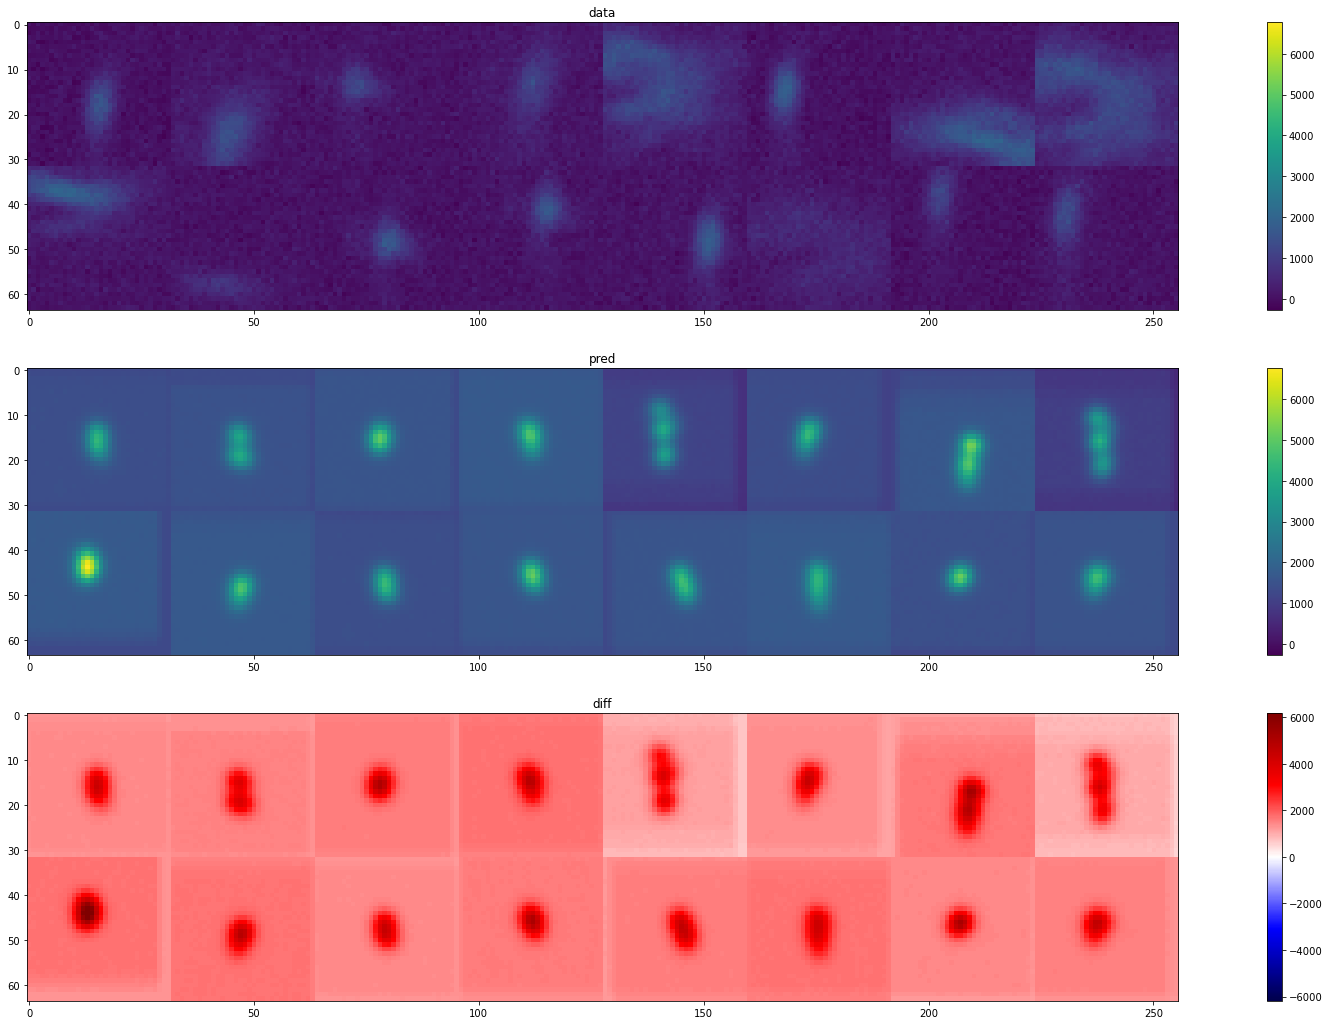

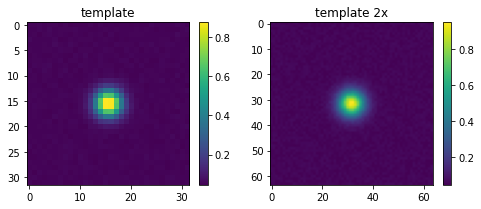

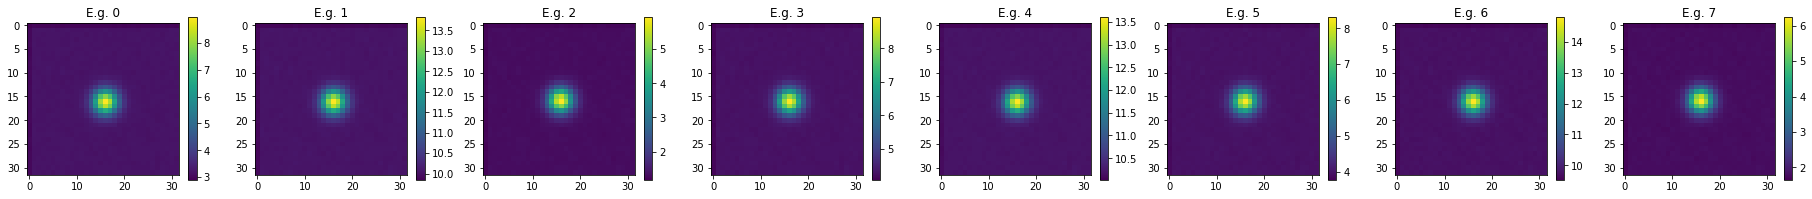

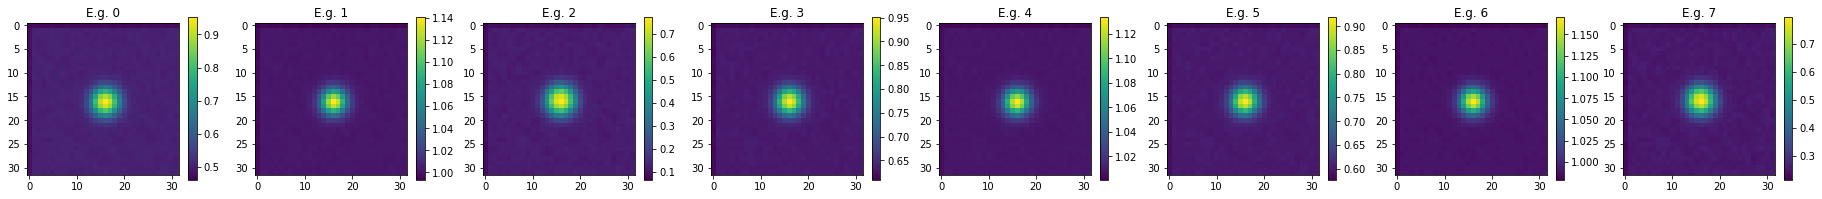

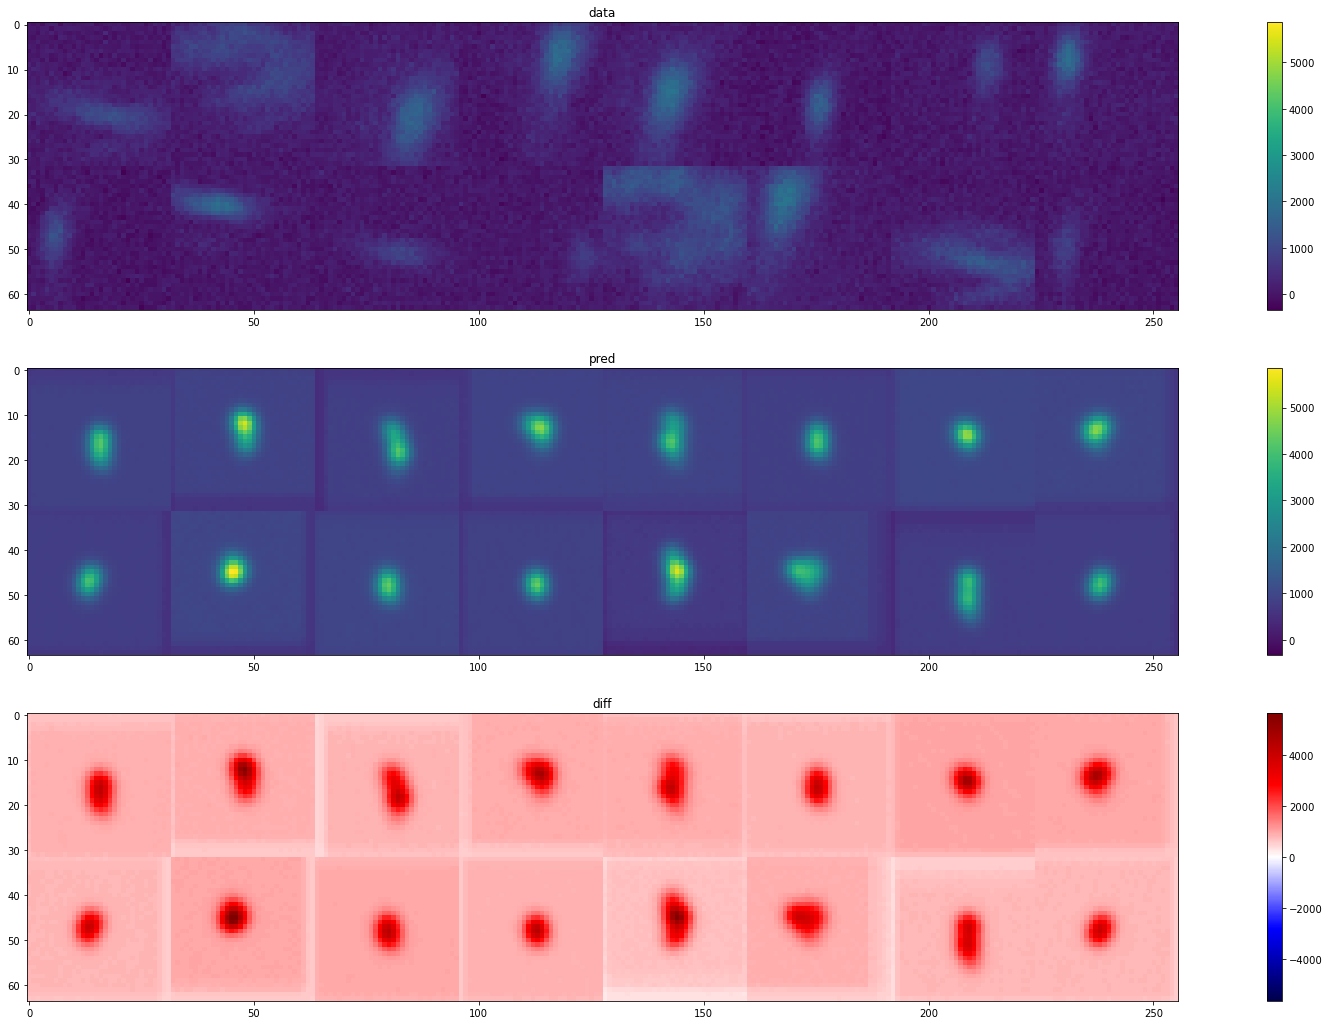

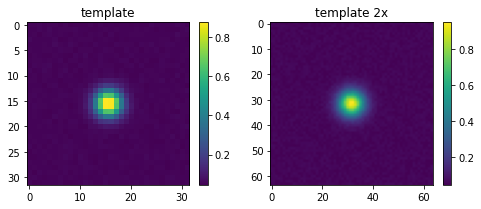

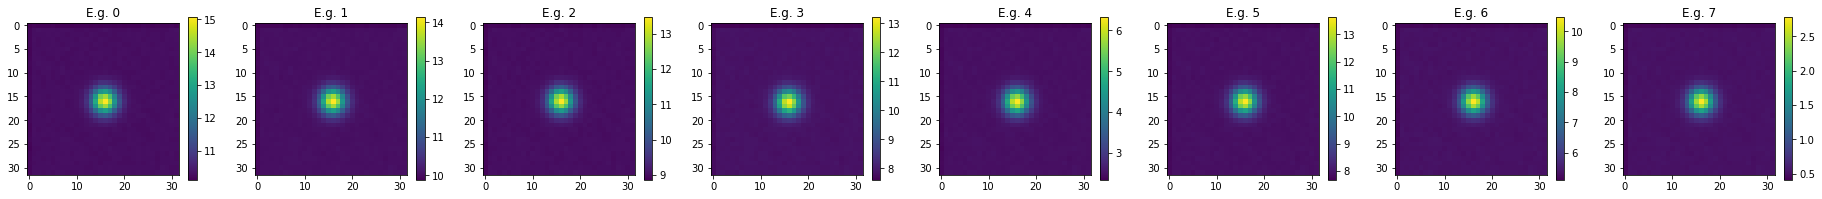

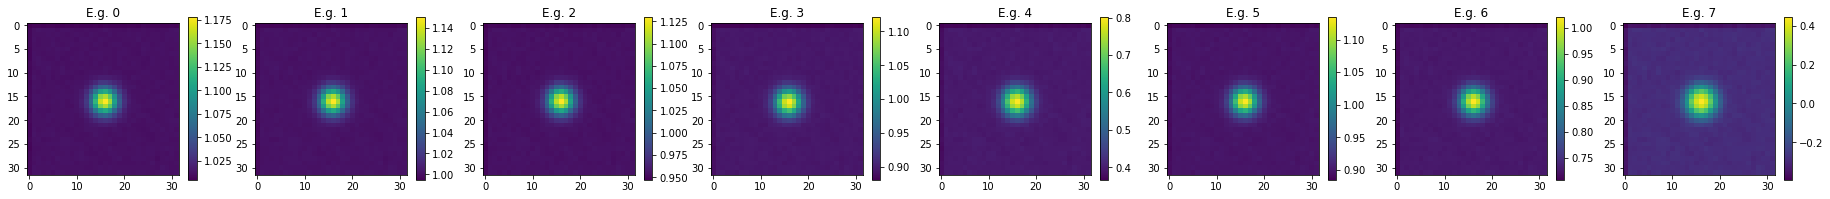

In [7]:
reload(trainer)


fitting_model = model.BaseFitModel(encoder_class=model.UnetEncoderModel,
                                   renderer_class=model.renderer.Template2DRenderer,
                                   mapper_class=model.mapper.CentroidMapperModel,
                                      fit_params=['x','y','A','bg'],
                                      max_psf_count=10,
                                      encoder_params={}
                                     )

training = trainer.FittingTrainer(fitting_model, train_dataloader, valid_dataloader,)
training.train_and_validate(2, tb_logger=True)
model.check_model(fitting_model, )

filepath = training.current_state["log_path"]
print(filepath)
training = trainer.FittingTrainer.from_model_file(os.path.join(filepath, "model.ptm"))
training.load_checkpoint(os.path.join(filepath, "checkpoint.ptc"))
training.train_data_loader = train_dataloader
training.valid_data_loader = valid_dataloader
training.train_and_validate(2, tb_logger=None)
model.check_model(fitting_model, )